# 第12章　Pandas：経済データ分析II

## はじめに

In [1]:
%pip install -q japanize-matplotlib-jlite py4macro
import japanize_matplotlib_jlite
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import py4macro

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 19.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 53.2 MB/s eta 0:00:00


## バブル景気前後の成長率の比較

コード12.2.1

In [2]:
jp = py4macro.data("jpn-yr")
jp.columns

Index(['gdp', 'consumption', 'investment', 'government', 'exports', 'imports',
       'gdp_gap', 'deflator', 'inflation', 'unemployment_rate', 'employed',
       'population', 'gov_debt', 'gov_net_debt'],
      dtype='object')

コード12.2.2

In [3]:
jp.iloc[:3, [0]]

,gdp
,
1980-01-01,273389.5
1981-01-01,285037.6
1982-01-01,294386.1


コード12.2.3

In [4]:
jp.loc[:"1982", ["gdp"]]

,gdp
,
1980-01-01,273389.5
1981-01-01,285037.6
1982-01-01,294386.1


コード12.2.4

In [5]:
jp["gdp_log"] = np.log( jp["gdp"] )
jp["gdp_growth"] = jp["gdp_log"].diff()

g_before = jp.loc[:"1992", "gdp_growth"].mean()
g_after = jp.loc["1993":, "gdp_growth"].mean()
g_diff = g_before - g_after

print(f"バブル崩壊前：{g_before:.4f}")
print(f"バブル崩壊後：{g_after:.4f}")
print(f"バブル崩壊前後での差：{g_diff:.4f}")

バブル崩壊前：0.0404
バブル崩壊後：0.0071
バブル崩壊前後での差：0.0332


## 消費 vs 投資

コード12.3.1

In [6]:
cols = ["gdp", "consumption", "investment"]

for col in cols[1:]:
    jp[col+"_growth"] = np.log( jp[col] ).diff()

コード12.3.2

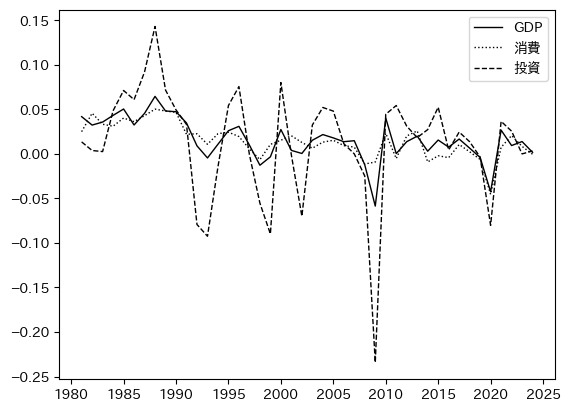

In [7]:
lstyles = ["-", ":", "--"]
labels = ["GDP", "消費", "投資"]

for col, lstyle, label in zip( cols, lstyles, labels):
    plt.plot(col+"_growth", data=jp, color="black",
             linewidth=1, linestyle=lstyle, label=label)

plt.legend()
plt.show()

コード12.3.3

In [8]:
print("成長率の標準偏差（GDP=1）")
print("-"*24)

for col, label in zip(cols[1:], labels[1:]):
    gdp_std = jp["gdp_growth"].std()
    std = jp[col+"_growth"].std() / gdp_std
    print(f"{label}: {std:.4f}")

成長率の標準偏差（GDP=1）
------------------------
消費: 0.8173
投資: 2.6856


コード12.3.4

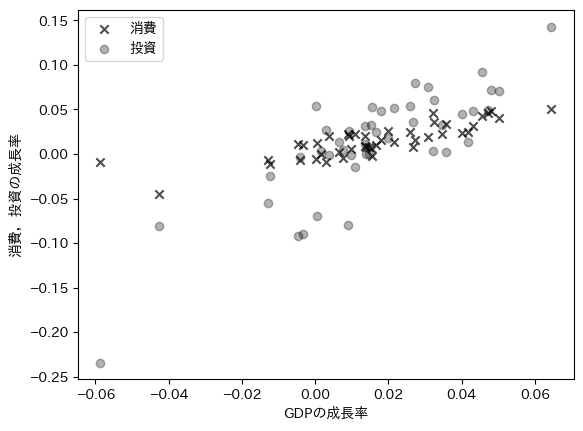

In [9]:
plt.scatter("gdp_growth", "consumption_growth", data=jp,
            alpha=0.7, color="black", label="消費",
            marker="x")
plt.scatter("gdp_growth", "investment_growth", data=jp,
            alpha=0.3, color="black", label="投資")
plt.xlabel("GDPの成長率")
plt.ylabel("消費，投資の成長率")
plt.legend()
plt.show()

コード12.3.5

In [10]:
vcov = jp[["gdp_growth", "consumption_growth"]].cov()
vcov

,gdp_growth,consumption_growth
gdp_growth,0.000545,0.000376
consumption_growth,0.000376,0.000364


コード12.3.6

In [11]:
print(vcov.iloc[0, 1])

0.00037567119379871384


コード12.3.7

In [12]:
print("成長率：GDPとの共分散")
print("-"*21)

for col, label in zip( cols[1:], labels[1:]):
    cvar = jp[[col+"_growth", "gdp_growth"]].cov().iloc[0,1]
    print(f"{label}: {cvar:.6f}")

成長率：GDPとの共分散
---------------------
消費: 0.000376
投資: 0.001206


コード12.3.8

In [13]:
ccorr = jp[["gdp_growth", "consumption_growth"]].corr()
ccorr

,gdp_growth,consumption_growth
gdp_growth,1.000000,0.842873
consumption_growth,0.842873,1.000000


コード12.3.9

In [14]:
print("成長率：GDPとの相関係数")
print("-"*20)

for col, label in zip( cols[1:], labels[1:]):
    cc = jp[[col+"_growth", "gdp_growth"]].corr().iloc[0,1]
    print(f"{label}: {cc:.6f}")

成長率：GDPとの相関係数
--------------------
消費: 0.842873
投資: 0.823797


## 1850年以降の経済成長率

コード12.4.1

In [15]:
mad = py4macro.data("mad")
mad.columns

Index(['countrycode', 'country', 'region', 'year', 'gdppc', 'pop'], dtype='object')

コード12.4.2

In [16]:
countries = ["Japan", "Germany", "United States", "China"]
kuni4 = {}

for country in countries:
    cond1 = ( mad["country"]==country )
    cond2 = ( mad["year"] >= 1850 )
    cond = cond1 & cond2
    tmp = mad.loc[cond, ["year", "gdppc"]]
    tmp["gdppc_log"] = np.log( tmp["gdppc"] )
    kuni4[country] = tmp

コード12.4.3

In [17]:
kuni4["Japan"].head(1)

,year,gdppc,gdppc_log
10231,1850,1436.0,7.269617


コード12.4.4

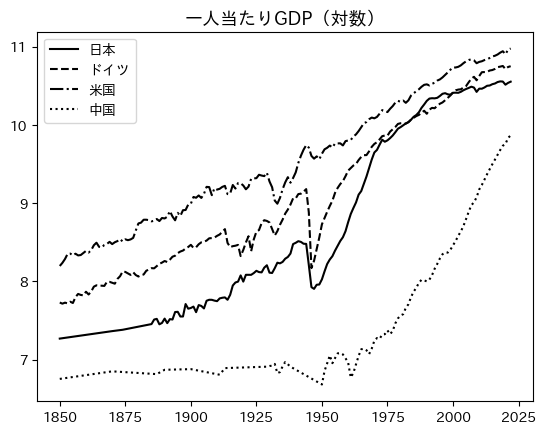

In [18]:
labels = ["日本", "ドイツ", "米国", "中国"]
lstyles = ["-", "--", "-.", ":"]

for country, label, lstyle in zip( countries, labels, lstyles ):
    plt.plot("year", "gdppc_log", data=kuni4[country],
             color="black", label=label, linestyle=lstyle)

plt.legend()
plt.title("一人当たりGDP（対数）", size=13)
plt.show()

コード12.4.5

In [19]:
dfjp = kuni4["Japan"]
dfjp["growth"] = dfjp["gdppc"].pct_change()

cond45 = ( dfjp["year"]==1945 )
cond46 = ( dfjp["year"]==1946 )

growth45 = dfjp.loc[cond45,"growth"].iloc[0]
growth46 = dfjp.loc[cond46,"growth"].iloc[0]

print("日本：一人当たりGDP")
print("-"*30)
print(f"1944 → 1945年の変化率： {growth45:.2%}" )
print(f"1945 → 1946年の変化率： {growth46:.2%}" )

日本：一人当たりGDP
------------------------------
1944 → 1945年の変化率： -23.64%
1945 → 1946年の変化率： -24.64%


コード12.4.6

In [20]:
print("日本の一人当たりGDP成長率")
print("-"*21)

for i in range(7):
    start = 1950 + 10 * i
    end = start + 10
    cond = ( ( start <= dfjp["year"] ) &
             ( dfjp["year"] <= end   ) )
    g = dfjp.loc[cond,"gdppc_log"].diff().mean()
    print(f"{start}年代：{g:.2%}")

日本の一人当たりGDP成長率
---------------------
1950年代：7.30%
1960年代：8.91%
1970年代：3.24%
1980年代：3.36%
1990年代：1.03%
2000年代：0.53%
2010年代：0.51%


## 超長期の経済成長：日本と英国

コード12.5.1

In [21]:
countries = ["Japan", "United Kingdom"]
cols = ["year", "gdppc"]

kuni2 = {}

for country in countries:
    cond = ( mad["country"]==country )
    kuni2[country] = mad.loc[cond, cols]

kuni2["Japan"].head()

,year,gdppc
10218,730,597.84
10219,1000,1009.65
10220,1150,926.97
10221,1280,841.11
10222,1450,866.55


コード12.5.2

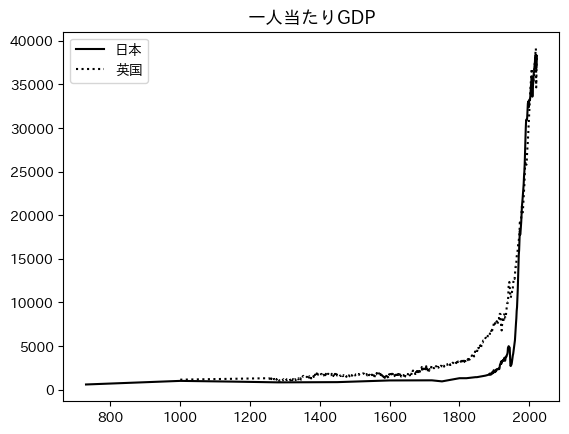

In [22]:
labels = ["日本", "英国"]
lstyles = ["-", ":"]

for country, label, lstyle in zip(countries, labels, lstyles ):
    plt.plot("year", "gdppc", data=kuni2[country],
             color="black", label=label, linestyle=lstyle)
plt.title("一人当たりGDP", size=13)
plt.legend()
plt.show()

## 世界の所得格差

コード12.6.1

In [23]:
pwt = py4macro.data("pwt")

コード12.6.2

In [24]:
cols = ["country", "rgdpe", "pop"]
cond = ( pwt["year"]==2019 )
pwt = pwt.loc[cond, cols]

pwt["gdppc"] = pwt["rgdpe"] / pwt["pop"]
pwt.head()

,country,rgdpe,pop,gdppc
69,Aruba,3921.261230,0.106314,36883.771004
139,Angola,228151.015625,31.825295,7168.857842
209,Anguilla,376.634979,0.014869,25330.215835
279,Albania,35890.019531,2.880917,12457.845725
349,United Arab Emirates,681525.812500,9.770529,69753.215256


コード12.6.3

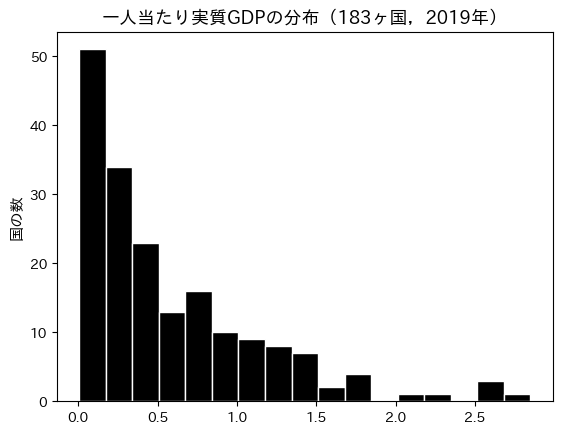

In [25]:
cond = ( pwt["country"]=="Japan" )
gdppc_jp = pwt.loc[cond, "gdppc"].iloc[0]
pwt["gdppc_jp"] = pwt["gdppc"] / gdppc_jp

num = pwt["gdppc_jp"].nunique()

plt.hist("gdppc_jp", data=pwt, color="black",
         bins=17, edgecolor="white")
plt.title(f"一人当たり実質GDPの分布（{num}ヶ国，2019年）",
          size=13)
plt.ylabel("国の数", size=11)
plt.show()

コード12.6.4

In [26]:
n = ( pwt["gdppc_jp"] >= 1.0 ).sum()
print(f"日本は{n}番目です。")

日本は38番目です。


コード12.6.5

In [27]:
n = ( pwt["gdppc_jp"] <= 0.1 ).sum()
print(f"0.1以下：{n}ヶ国")

n = ( pwt["gdppc_jp"] <= 0.05 ).sum()
print(f"0.05以下：{n}ヶ国")

0.1以下：33ヶ国
0.05以下：14ヶ国
